## 共識度 scenarios

#### 假設類別都相同
1. 同一張圖, 只標註一個
   - 單張圖無交叉點 (case1)
   - 單張圖有交叉點 (case2)
2. 同一張圖, 標記數量不同個
    - 單張無交叉點 (case3)

In [1]:
from typing import List
def convert_to_coordinates(flat_coords: List) -> List:
    return [(flat_coords[i], flat_coords[i + 1]) for i in range(0, len(flat_coords), 2)]

## shapely

In [6]:
# shapely 2.0.6 
from shapely.geometry import Polygon
from shapely.validation import explain_validity

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon as mpl_polygon

#修復多邊形
def fix_invalid_polygon(polygon):
    if not polygon.is_valid:
        print(f"Invalid geometry: {explain_validity(polygon)}")
        polygon = polygon.buffer(0)
        print(f"Fixed geometry: {explain_validity(polygon)}")
    return polygon

def plot_polygons(polygons, ax, colors):
    patches = []
    for i, poly in enumerate(polygons):
        # Convert Shapely polygon to matplotlib polygon
        exterior_coords = np.array(poly.exterior.coords)
        mpl_poly = mpl_polygon(exterior_coords, closed=True, edgecolor='black', facecolor=colors[i])
        patches.append(mpl_poly)
    
    p = PatchCollection(patches, match_original=True, alpha=0.5)
    ax.add_collection(p)
    ax.autoscale_view()

In [7]:
#case1
a=[60.52, 56.93, 56.32, 59.73, 57.19, 62.88, 58.24, 64.46, 59.99, 64.99, 63.32, 64.46, 64.02, 63.76, 64.02, 61.48, 63.32, 57.8, 62.8, 57.28]
b=[59.89, 65.73, 57.98, 65.06, 56.74, 63.6, 56.4, 61.91, 56.74, 60.11, 58.09, 58.65, 59.21, 57.19, 61.35, 56.63, 63.26, 56.63, 65.17, 57.53, 66.18, 58.99, 66.63, 60.79, 66.4, 62.7, 65.17, 64.05, 63.37, 64.94, 61.35, 65.62, 59.33, 65.62]

In [8]:
polygon1 = Polygon(convert_to_coordinates(a))
polygon2 = Polygon(convert_to_coordinates(b))

polygon1 = fix_invalid_polygon(polygon1)
polygon2 = fix_invalid_polygon(polygon2)

intersection = polygon1.intersection(polygon2).area
union = polygon1.union(polygon2).area
iou = intersection / union
print(f"[shapely 2.0.6]")
print(f"intersection={intersection}")
print(f"union={union}")
print(f"iou={iou}")

Invalid geometry: Self-intersection[59.5764179104478 65.62]
Fixed geometry: Valid Geometry
[shapely 2.0.6]
intersection=46.188632888796704
union=72.19012009627791
iou=0.6398193108308483


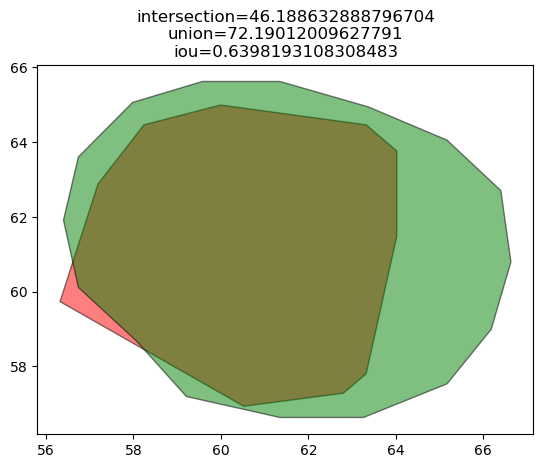

In [9]:
fig, ax = plt.subplots()
ax.set_title(f"intersection={intersection}\nunion={union}\niou={iou}")
plot_polygons([polygon1, polygon2], ax, ["red","green"])
plt.show()

## numpy + cv2

In [25]:
import cv2
import numpy as np
from typing import List
import matplotlib.pyplot as plt

def create_mask_from_polygon(polygon_coords: List, image_shape: tuple):
    mask = np.zeros(image_shape, dtype=np.uint8)
    cv2.fillPoly(mask, [polygon_coords], 1)
    return mask

In [26]:
#case1
image_shape = (100, 100) # 定義影像尺寸，假設多邊形點都在 100x100 範圍內 #TODO
a=[60.52, 56.93, 56.32, 59.73, 57.19, 62.88, 58.24, 64.46, 59.99, 64.99, 63.32, 64.46, 64.02, 63.76, 64.02, 61.48, 63.32, 57.8, 62.8, 57.28]
b=[59.89, 65.73, 57.98, 65.06, 56.74, 63.6, 56.4, 61.91, 56.74, 60.11, 58.09, 58.65, 59.21, 57.19, 61.35, 56.63, 63.26, 56.63, 65.17, 57.53, 66.18, 58.99, 66.63, 60.79, 66.4, 62.7, 65.17, 64.05, 63.37, 64.94, 61.35, 65.62, 59.33, 65.62]

In [27]:
polygon1_coords = np.array(convert_to_coordinates(a), dtype=np.int32)
polygon2_coords = np.array(convert_to_coordinates(b), dtype=np.int32)

mask1 = create_mask_from_polygon(polygon1_coords, image_shape)
mask2 = create_mask_from_polygon(polygon2_coords, image_shape)

intersection = np.logical_and(mask1, mask2).sum()
union = np.logical_or(mask1, mask2).sum()
iou = intersection / union
print(f"[Use cv2 & numpy]")
print(f"intersection={intersection}")
print(f"union={union}")
print(f"iou={iou}")

[Use cv2 & numpy]
intersection=58
union=92
iou=0.6304347826086957


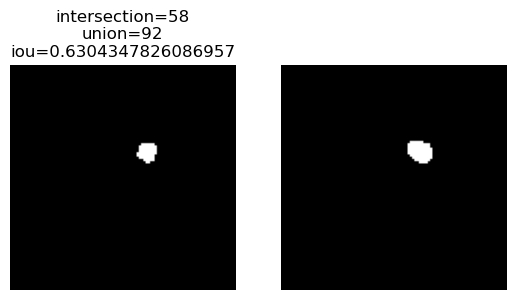

In [32]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(mask1, cmap='gray')
# axs[0].set_title('Mask 1')
axs[0].set_title(f"intersection={intersection}\nunion={union}\niou={iou}")
axs[0].axis('off')
axs[0].invert_yaxis()

axs[1].imshow(mask2, cmap='gray')
# axs[1].set_title('Mask 2')
axs[1].axis('off')
axs[1].invert_yaxis()

In [31]:
a1=[60.52, 56.93, 56.32, 59.73, 57.19, 62.88, 58.24, 64.46, 59.99, 64.99, 63.32, 64.46, 64.02, 63.76, 64.02, 61.48, 63.32, 57.8, 62.8, 57.28]
a2=[70, 50, 75, 55, 73, 60, 68, 60, 65, 55]

b=[59.89, 65.73, 57.98, 65.06, 56.74, 63.6, 56.4, 61.91, 56.74, 60.11, 58.09, 58.65, 59.21, 57.19, 61.35, 56.63, 63.26, 56.63, 65.17, 57.53, 66.18, 58.99, 66.63, 60.79, 66.4, 62.7, 65.17, 64.05, 63.37, 64.94, 61.35, 65.62, 59.33, 65.62]

In [32]:
polygona1 = Polygon(convert_to_coordinates(a1))
polygona2 = Polygon(convert_to_coordinates(a2))
polygon2 = Polygon(convert_to_coordinates(b))

polygona1 = fix_invalid_polygon(polygona1)
polygona2 = fix_invalid_polygon(polygona2)
polygon2 = fix_invalid_polygon(polygon2)

Invalid geometry: Self-intersection[59.5764179104478 65.62]
Fixed geometry: Valid Geometry


In [37]:
intersection = polygona1.intersection(polygon2).area + polygona2.intersection(polygon2).area
union = polygona1.union(polygon2).area + polygona2.union(polygon2).area
iou = intersection / union
print(f"[shapely 2.0.6]")
print(f"intersection={intersection}")
print(f"union={union}")
print(f"iou={iou}")

[shapely 2.0.6]
intersection=46.188632888796704
union=206.05422308135252
iou=0.22415766198861603


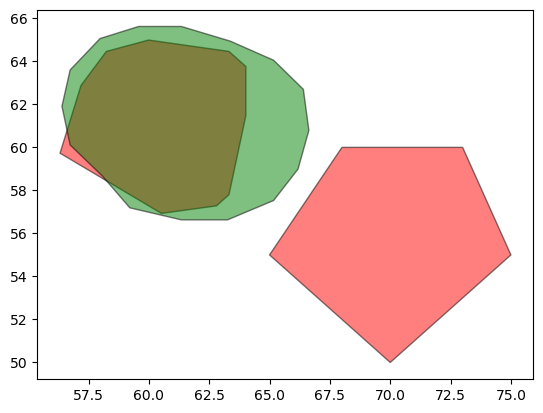

In [33]:
fig, ax = plt.subplots()
# ax.set_title(f"intersection={intersection}\nunion={union}\niou={iou}")
plot_polygons([polygona1, polygona2, polygon2], ax, ["red","red","green"])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.ops import unary_union

a=[[(55.44, 69.19), (55.26, 71.64), (56.49, 72.87), (58.07, 71.82), (58.77, 70.42), (58.94, 69.02), (57.37, 67.96)], [(58.07, 58.86), (58.94, 62.88), (59.29, 65.69), (61.22, 69.02), (63.5, 69.02), (63.67, 64.46), (64.9, 60.43), (64.02, 57.28), (62.62, 54.3), (61.57, 54.83), (60.17, 56.4)]]
b=[[(62.57, 50.82), (66.26, 54.85), (68.94, 59.21), (69.61, 64.91), (68.27, 69.95), (64.24, 73.64), (59.55, 75.99), (54.85, 78.0), (49.48, 75.65), (48.14, 70.62), (47.47, 64.58), (47.47, 59.21), (49.48, 54.51), (53.51, 51.16), (58.54, 49.82)]]

In [ ]:
len(a), len(b)

In [ ]:
polygons_a = [Polygon(poly) for poly in a]
polygons_b = [Polygon(poly) for poly in b]

union_a = unary_union(polygons_a)
union_b = unary_union(polygons_b)

intersection = union_a.intersection(union_b).area
union = union_a.union(union_b).area

iou = intersection / union
print(f"IoU: {iou}")



fig,ax = plt.subplots()
for polygon in polygons_a:
    if not polygon.is_empty:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color='blue', alpha=0.5, label='Polygon A')

for polygon in polygons_b:
    if not polygon.is_empty:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color='red', alpha=0.5, label='Polygon B')


ax.invert_yaxis()
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
#有交集的case, 因為補0, 形狀有變化, 可能會影響真實性
a=[190.87, 73.28, 200.39, 72.22, 205.15, 76.99, 205.15, 80.16, 200.66, 81.48, 194.04, 79.1, 189.55, 74.87, 189.02, 73.81]
b=[191.45, 72.94, 194.36, 73.47, 196.48, 72.94, 200.97, 74.0, 202.3, 77.96, 204.15, 79.02, 204.15, 76.38, 202.83, 76.64, 199.92, 76.91, 196.48, 76.91, 193.04, 76.64, 190.39, 75.85, 189.86, 73.47]